In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (a)

In [11]:
n_nums = 100000  # the number of random numbers that we want

# define an array to hold the random numbers with the distribution that we want
kept_nums = np.zeros(n_nums)  

# we want numbers between 0 and 10, so define the min and max
nmin = 0  
nmax = 10  

for i in range(n_nums):  # we'll do the below for each random number that we want to pick
    num = -1
    while(num == -1):  # keep picking random numbers until we get one we want to keep
        # np.random.random() gives a uniformly-distributed random number in the half-open interval [0,1)
        # first adjust this to the range of numbers that we want
        rand_num = np.random.random()*(nmax-nmin) + nmin  # this gives a random number uniformly distributed between nmin and nmax

        # we don't want a uniform distribution, so we'll keep our number with a probability proportional
        # to the probability distribution that we want
        # in this case, we want a probability f(x) proportional to x^2
        # normalize it so that the number with the maximum probability (in this case 10) has a probability of 1
        # f(x) = (x/10)^2 = (rand_num/nmax)^2
        
        # (note that if you make the maximum proability greater than 1, this code won't distinguish
        # between numbers that have different probabilities > 1 and you won't get the right distribution;
        # if you make the maximum probability less than 1, it will work but it will be inefficient since
        # it will throw away more numbers than it needs to)
         
        pkeep = (rand_num/nmax)**2  # the probability that we want to keep the number we drew 
        
        # pick a uniformly distributed random number between 0 and 1 and if it's less than pkeep, keep the number
        # this means that the number had a probability pkeep of being kept
        if np.random.random() <= pkeep:
            num = rand_num
    
    # add our number to the list of kept numbers
    kept_nums[i] = num

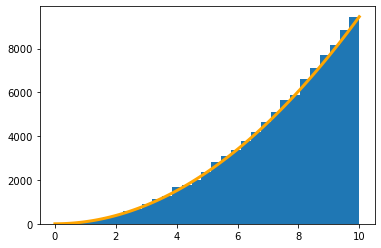

In [12]:
x = np.linspace(nmin,nmax,100) # 100 evenly spaced numbers between 0 and 10
norm_max = np.max(np.histogram(kept_nums, bins=30)[0]) # get the maximum number in a histogram bin
fx = norm_max*(x/nmax)**2  # the probability distribution proportional to x^2

plt.hist(kept_nums, bins=30)
plt.plot(x,fx,'orange',linewidth=3)
plt.show()

In [18]:
n_nums = 100000  # the number of random numbers that we want

# define an array to hold the random numbers with the distribution that we want
kept_nums = np.zeros(n_nums)  

# we want numbers between 0 and 10, so define the min and max
nmin = 0  
nmax = 7  

for i in range(n_nums):  # we'll do the below for each random number that we want to pick
    num = -1
    while(num == -1):  # keep picking random numbers until we get one we want to keep
        # np.random.random() gives a uniformly-distributed random number in the half-open interval [0,1)
        # first adjust this to the range of numbers that we want
        rand_num = np.random.random()*(nmax-nmin) + nmin  # this gives a random number uniformly distributed between nmin and nmax

        # we don't want a uniform distribution, so we'll keep our number with a probability proportional
        # to the probability distribution that we want
        # in this case, we want a probability f(x) proportional to np.exp(-np.abs(z)/H)
        # normalize it so that the number with the maximum probability (in this case 10) has a probability of 1
        # f(x) = (x/10)^2 = (rand_num/nmax)^2
        
        # (note that if you make the maximum proability greater than 1, this code won't distinguish
        # between numbers that have different probabilities > 1 and you won't get the right distribution;
        # if you make the maximum probability less than 1, it will work but it will be inefficient since
        # it will throw away more numbers than it needs to)
         
        pkeep = np.exp(-(np.abs(rand_num))/1.0) # the probability that we want to keep the number we drew 
        
        # pick a uniformly distributed random number between 0 and 1 and if it's less than pkeep, keep the number
        # this means that the number had a probability pkeep of being kept
        if np.random.random() <= pkeep:
            num = rand_num
    
    # add our number to the list of kept numbers
    kept_nums[i] = num

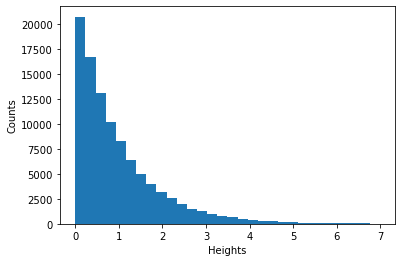

In [31]:
x = np.linspace(nmin,nmax,100) # 100 evenly spaced numbers between 0 and 10
norm_max = np.max(np.histogram(kept_nums, bins=30)[0]) # get the maximum number in a histogram bin

plt.hist(kept_nums, bins=30)
plt.xlabel('Heights')
plt.ylabel('Counts')
plt.show()

## (b)

In [22]:
#second set of particles, photons entering atmosphere from the top
nphotons = 20000  # photon number
b = 0.008
sigma = np.pi*b**2.0  # cross-section 

# generate random x and y values for the photons
xphotons = np.random.random(nphotons)*1.0
yphotons = np.random.random(nphotons)*1.0

# initialize array to hold the height where the photon first interacts with an atmosphere particle
height_coll = np.zeros(nphotons)

In [23]:
xparts = np.random.random(n_nums)*1.0 
yparts = np.random.random(n_nums)*1.0

In [27]:
for j in range(nphotons):
    
    # The particles in the photon's path are those with projected distances less than b in the xy-plane.
    particles_in_path = np.where(np.sqrt((xparts-xphotons[j])**2 + (yparts-yphotons[j])**2) < b)
    
    if len(particles_in_path[0]) == 0:  # no collisions, less than b in xy-plane
        height_coll[j] = 0
        
    else:
        # this finds the maximum of our height array
        height_coll[j] = np.max(kept_nums[particles_in_path[0]]) 

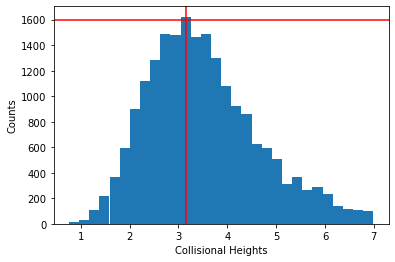

In [40]:
plt.hist(height_coll, bins=30)
plt.axvline(3.15, 0, 1700, c='red')
plt.axhline(1600, 0, 7, c='red')
plt.xlabel('Collisional Heights')
plt.ylabel('Counts')
plt.show()

The maximum occurs around a collision height of 3.

This is where the most amount of photons get absorbed into the atmosphere -- the height at which the most amount of collisions occur.

$$ \tau = n(z) \sigma H $$

## (c)

Estimate the number density of particles at the surface
in your simulation by counting the number of particles between the surface and the first
scale height and dividing by the volume of this region.

PS2 resource: large optical depths $\propto$ to higher rate of obscuration. Optical depth can therefore be thought of as the *opacity* of a medium.

https://en.wikipedia.org/wiki/Optical_depth_(astrophysics)

In [43]:
n0 = len(np.where(kept_nums < 1.0)[0])/1.0/1.0/1.0

In [44]:
n0

63436.0

In [47]:
def opt_depth(z, H):
    n = n0*np.exp(-z/H)
    tau = n*sigma*H
    print(tau)

In [49]:
#Optical depth where max photons are absorbed
opt_depth(3.0, 1.0) #intuition for this number is that it's the opacity of our atmosphere

0.6350123787806419


In [50]:
#optical depth where not many photons are being absorbed
opt_depth(2.0, 1.0), opt_depth(6.0, 1.0)

1.726142610085971
0.03161540471679173


(None, None)